<a href="https://colab.research.google.com/github/danielsineus/Financial-Analysis/blob/master/Assignement_portfoliooptimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio Optimization
I have considered a list of securities to be my investment universe. Before investing, it is important to construct the portfolio. We will start by the security selection. We make the attempt to identify the risk-return combinations available from the given assets. We also determine the optimal portfolio by also finding the portfolio weights in the steepest CAL. We will at last choose an appropriate complete portfolio by mixing the risk free asset with the optimal risky portfolio.The best portfolio is the most optimal mean-variance portfolio.We are going to consider a top-down approach, i.e considering the general principles and theory for a mean-variance optimization portfolio. The idea of this project stems from an assignment given by my Portfolio Management Professor, Mr. Matthews.
It is important to emphasize that not all of piece of codes and results that are commented. But they will be soon be commented.

In [2]:
import pandas as pd
from pandas import Series, DataFrame


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader as web
from matplotlib.ticker import FuncFormatter

In [4]:
!pip install PyPortfolioOpt # install the package for portfolio management


     |████████████████████████████████| 61 kB 3.4 MB/s 
     |████████████████████████████████| 2.7 MB 10.9 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [5]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 5.0 MB/s 
     |████████████████████████████████| 63 kB 958 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [6]:
from pypfopt.efficient_frontier import EfficientFrontier


In [7]:
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.cla import CLA
from matplotlib.ticker import FuncFormatter

In [8]:
from pypfopt import expected_returns
from pypfopt.cla import CLA

from matplotlib.ticker import FuncFormatter

## Selection of Securities for the project
Spy Domestic large Cap

MDY Domestic Mid Cap

IJR Domestic Small Cap

ACWX international 

EFA Developed Country International

the list continues with BNDX, EFA, EMB, MDY, TLT, WFC, GME, AAPL, CCBG, HD, FPL, WMT, DIS.

###Contents 

*   Codes and Graphs will be provided for visualization
*   Retrieval of financial data from YAHOO Finance
*   Mean and Variance
* Covariance Matrix
* Expected annual return of the Portfolio
* Portfolio volatility - Standard deviation 
* Sharpe ratio
*Normality Test 
*Value at risk and Conditional value at Risk
*interpretation
*Efficient Frontier

*   References

graph of cumulative returns will be presented in order to observe the stocks's return

#Main objectives - Sharpe Ratio and Efficient Frontier
The purpose of the project is to get to the efficient frontier and also to an MVO portfolio. 

# GETTING DATA FROM WEBSITE
Get data from yahoo Finance
Use the package Yahoo Finance

In [11]:
import yfinance as yf# import yfinance package to get tickers



In [10]:
symbol=["BNDX", "EFA", "EMB", "MDY", "TLT","WFC", "GME", "AAPL","CCBG", "HD", "FPL", "WMT", "DIS", "SPY", "MDY","IJR","ACWX","EFA"]
startperiod="2016-01-04"
endperiod="2021-11-04"


In [12]:
tickerData=yf.download(symbol, startperiod, endperiod)["Adj Close"]
tickerData.head()

[*********************100%***********************]  16 of 16 completed


,AAPL,ACWX,BNDX,CCBG,DIS,EFA,EMB,FPL,GME,HD,IJR,MDY,SPY,TLT,WFC,WMT
Date,,,,,,,,,,,,,,,,
2016-01-04,24.220577,33.153957,45.461796,13.542315,97.155785,48.449764,80.069672,5.951170,21.848803,114.283226,49.329937,232.664307,180.112778,106.618378,43.965508,53.968376
2016-01-05,23.613621,33.119831,45.436054,13.821819,95.193420,48.374352,80.281860,5.956551,22.203817,113.725174,49.481312,232.738541,180.417419,106.188171,43.948891,55.250423
2016-01-06,23.151516,32.505394,45.607643,13.939029,94.683960,47.578308,80.274284,5.660606,21.895105,112.548096,48.917114,229.454803,178.141571,107.619133,43.109631,55.803616
2016-01-07,22.174410,31.771484,45.539013,13.722638,93.872604,46.589535,79.895378,5.407706,21.956852,109.339409,47.660229,223.592239,173.867676,107.812271,41.879826,57.103222
2016-01-08,22.291664,31.438663,45.530434,13.497236,93.636734,46.028122,79.827202,5.563752,21.895105,108.031525,46.866657,220.605362,171.959213,108.295135,41.181835,55.794842


In [13]:
# Saving the DataFrame as CSV file
datafinance=tickerData.to_csv("datfinance", index=False)

In [15]:
print(tickerData.isnull().sum())#to check to see if there are empty values

AAPL    0
ACWX    0
BNDX    0
CCBG    0
DIS     0
EFA     0
EMB     0
FPL     0
GME     0
HD      0
IJR     0
MDY     0
SPY     0
TLT     0
WFC     0
WMT     0
dtype: int64


In [17]:
tickerData.aggregate([min, max, np.median, np.mean, np.std]).round(2)#summary of the data

,AAPL,ACWX,BNDX,CCBG,DIS,EFA,EMB,FPL,GME,HD,IJR,MDY,SPY,TLT,WFC,WMT
min,21.01,29.76,45.42,11.82,83.82,43.05,78.13,2.47,2.80,97.52,44.29,209.25,163.84,104.74,20.67,53.42
max,156.26,57.74,56.46,29.18,201.91,80.56,111.67,8.75,347.51,370.79,117.31,525.04,463.09,167.84,58.15,150.84
median,46.03,43.12,49.49,21.92,109.67,60.18,95.28,6.93,15.51,179.23,72.75,329.78,263.06,118.33,44.96,92.49
mean,62.55,43.08,51.14,20.89,121.20,60.14,96.97,6.43,35.80,192.64,74.34,337.22,276.53,127.11,42.56,97.51
std,38.86,6.57,3.44,4.17,29.44,8.70,8.11,1.50,59.10,65.88,16.67,70.16,72.02,17.82,8.18,28.72


###Normality Test
**Shapiro-Wilk Test**


"This test helps us to validate how likely the data is drawn from a Gaussian distribution. Moreover Shapiro-Wilk test is one of the popular test for normality test although there is some assumptions that the test may be suitable for smaller samples of data, e.g. thousands of observations or fewer".
(*reference*:https://colab.research.google.com/drive/186bbVPzBkzRonXvAFKuit5ECKu-bR2dh?authuser=2#scrollTo=8_1MJVyvFfGT&line=6&uniqifier=1)

In [20]:
#Shapiro-Wilk Test -important VaR and CVaR
from scipy.stats import shapiro
#normality test
stat,p=shapiro(tickerData)
print("Statistics=%.3f, p=%.3f" %(stat,p))
#interpret results  

Statistics=0.818, p=0.000
Sample doesn't look Gaussian(reject H0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Data look normal except that that p-value test might not be suitable for 5000

In [23]:
#returns and covariance
return1=tickerData.pct_change()
return1. dropna().head()


,AAPL,ACWX,BNDX,CCBG,DIS,EFA,EMB,FPL,GME,HD,IJR,MDY,SPY,TLT,WFC,WMT
Date,,,,,,,,,,,,,,,,
2016-01-05,-0.025060,-0.001029,-0.000566,0.020639,-0.020198,-0.001557,0.002650,0.000904,0.016249,-0.004883,0.003069,0.000319,0.001691,-0.004035,-0.000378,0.023756
2016-01-06,-0.019569,-0.018552,0.003776,0.008480,-0.005352,-0.016456,-0.000094,-0.049684,-0.013904,-0.010350,-0.011402,-0.014109,-0.012614,0.013476,-0.019096,0.010012
2016-01-07,-0.042205,-0.022578,-0.001505,-0.015524,-0.008569,-0.020782,-0.004720,-0.044677,0.002820,-0.028509,-0.025694,-0.025550,-0.023992,0.001795,-0.028527,0.023289
2016-01-08,0.005288,-0.010475,-0.000188,-0.016426,-0.002513,-0.012050,-0.000853,0.028856,-0.002812,-0.011962,-0.016651,-0.013359,-0.010977,0.004479,-0.016667,-0.022913
2016-01-11,0.016192,0.000814,-0.001130,0.019372,0.006751,0.004187,-0.001708,-0.060929,0.035601,0.015173,0.000098,-0.003028,0.000990,-0.010944,0.010694,0.010702


In [24]:
return2=np.log(tickerData/tickerData.shift(1))#another way to calculate the return
return2.head()

,AAPL,ACWX,BNDX,CCBG,DIS,EFA,EMB,FPL,GME,HD,IJR,MDY,SPY,TLT,WFC,WMT
Date,,,,,,,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,-0.025379,-0.001030,-0.000566,0.020429,-0.020405,-0.001558,0.002647,0.000904,0.016118,-0.004895,0.003064,0.000319,0.001690,-0.004043,-0.000378,0.023478
2016-01-06,-0.019763,-0.018726,0.003769,0.008444,-0.005366,-0.016593,-0.000094,-0.050961,-0.014001,-0.010404,-0.011468,-0.014210,-0.012695,0.013386,-0.019281,0.009963
2016-01-07,-0.043121,-0.022837,-0.001506,-0.015646,-0.008606,-0.021001,-0.004731,-0.045706,0.002816,-0.028924,-0.026030,-0.025882,-0.024284,0.001793,-0.028942,0.023022
2016-01-08,0.005274,-0.010531,-0.000188,-0.016562,-0.002516,-0.012123,-0.000854,0.028448,-0.002816,-0.012034,-0.016791,-0.013449,-0.011037,0.004469,-0.016807,-0.023179


In [25]:
mean_return_rate=return1.mean()
mean_return_rate

AAPL    0.001418
ACWX    0.000432
BNDX    0.000132
CCBG    0.000776
DIS     0.000528
EFA     0.000406
EMB     0.000223
FPL     0.000260
GME     0.004313
HD      0.000918
IJR     0.000701
MDY     0.000649
SPY     0.000708
TLT     0.000247
WFC     0.000331
WMT     0.000784
dtype: float64

In [26]:
std_return_rate=return1.std()
std_return_rate

AAPL    0.018549
ACWX    0.011390
BNDX    0.001927
CCBG    0.023859
DIS     0.017214
EFA     0.011139
EMB     0.006059
FPL     0.023741
GME     0.080819
HD      0.015584
IJR     0.014868
MDY     0.013725
SPY     0.011390
TLT     0.008658
WFC     0.021095
WMT     0.013531
dtype: float64

Text(0, 0.5, 'daily returns')

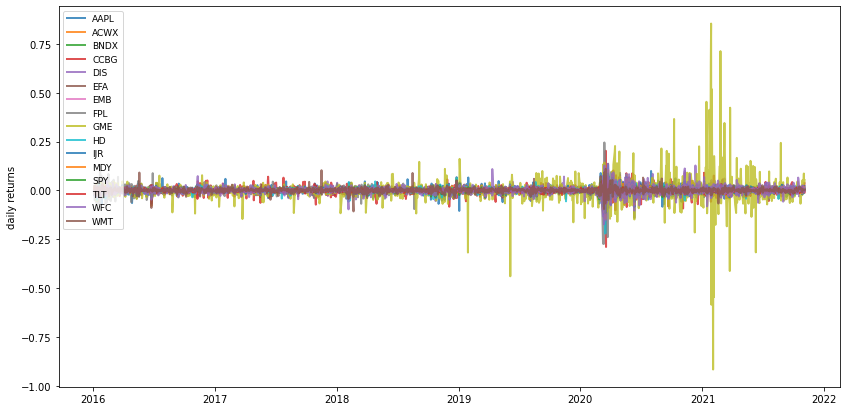

In [27]:
plt.figure(figsize=(14,7))# Visualize the return
for i in return2.columns.values:
  plt.plot(return2.index,return2[i],lw=2,alpha=0.8, label=i)
plt.legend(fontsize=9)
plt.ylabel("daily returns")
#Gamestop has more return peaks than the other securities

In [21]:
import scipy.stats as stats
from scipy.stats import norm

In [30]:
# compute the 95% Value at risk using the ppf()
var_95=norm.ppf(0.95, loc=mean_return_rate, scale=std_return_rate)
print("Value at Risk for the given tickers :", var_95)

Value at Risk for the given tickers : [0.03192884 0.01916775 0.0033015  0.04002136 0.02884246 0.01872834
 0.01018953 0.03931172 0.13724902 0.02655171 0.02515731 0.02322527
 0.01944238 0.01448842 0.03502923 0.02304135]


In [33]:
#Assuming i decide to invest $200 in each securities. The loss that might result for each if the level confidence is 95% is 
asset=200
print("for each 200 invested in each securities equally, the loss might ",asset*var_95)


for each 200 invested in each securities equally, the loss might  [ 6.38576826  3.83354984  0.66030038  8.0042722   5.76849229  3.74566708
  2.03790639  7.86234317 27.44980323  5.31034233  5.03146114  4.64505419
  3.88847668  2.89768386  7.00584622  4.6082708 ]


#Graphs of the securities part of the investment universe
It helps see the trends of each securities and also the variation of the stocks through a given period of time. The graph of cumulative returns will be presented in order to observe the stocks's return. there will be a series of thwo or three graphs. one might show clearer outpout to infer trends than others. one graph put all of the tickers in pictures and another considers separately each one of them.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f51d982a650>,
      dtype=object)

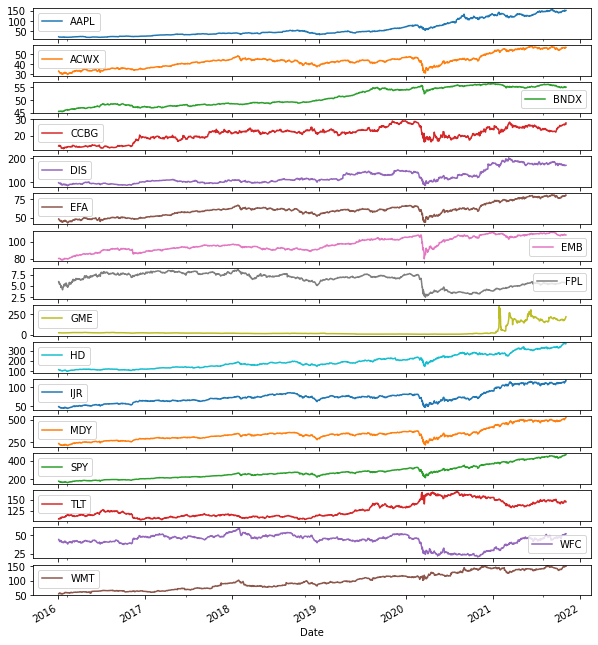

In [34]:
tickerData.plot(figsize=(10,12), subplots=True)

AxesSubplot(0.125,0.2;0.775x0.68)


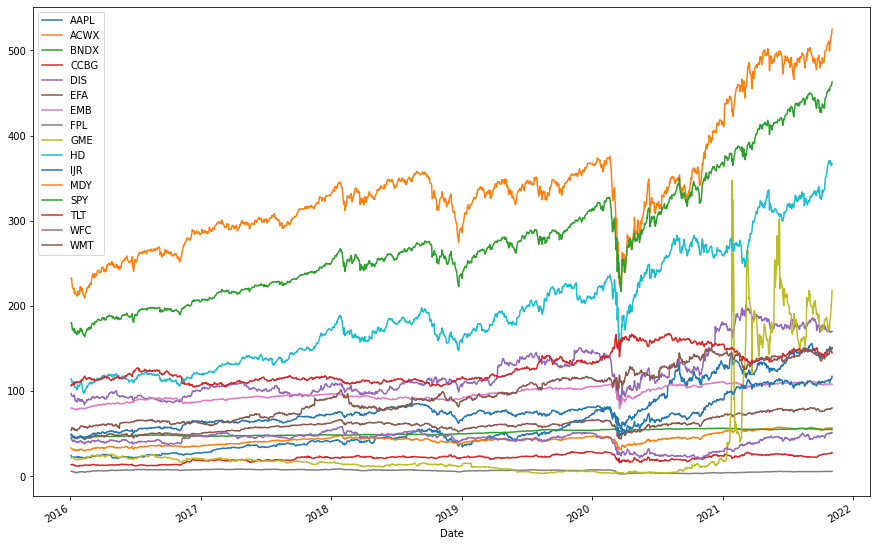

In [35]:

print(tickerData.plot(figsize=(15,10)))

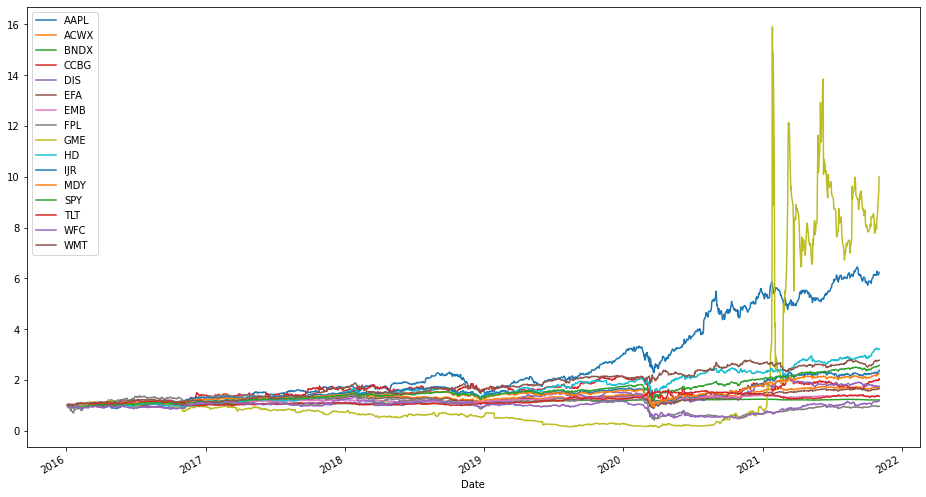

In [36]:
ret1=np.log(tickerData/tickerData.shift(1))
ret1.head()
ret1.cumsum().apply(np.exp).plot(figsize=(16,9))

# Use PyPortfolioOpt package for portfolio Optimization in **Finance**

In [37]:
#Expected Return and covariance
mu1=expected_returns.mean_historical_return(tickerData)
mu1

AAPL    0.368636
ACWX    0.096723
BNDX    0.033450
CCBG    0.131208
DIS     0.100750
EFA     0.090233
EMB     0.052779
FPL    -0.006985
GME     0.483798
HD      0.221663
IJR     0.160108
MDY     0.149723
SPY     0.175728
TLT     0.054159
WFC     0.027721
WMT     0.190957
dtype: float64

In [38]:
sigma=risk_models.sample_cov(tickerData).round(3)
sigma

,AAPL,ACWX,BNDX,CCBG,DIS,EFA,EMB,FPL,GME,HD,IJR,MDY,SPY,TLT,WFC,WMT
AAPL,0.087,0.033,0.001,0.029,0.033,0.031,0.011,0.041,0.040,0.038,0.037,0.038,0.040,-0.010,0.035,0.022
ACWX,0.033,0.033,0.001,0.035,0.029,0.031,0.012,0.041,0.023,0.029,0.034,0.034,0.029,-0.008,0.038,0.014
BNDX,0.001,0.001,0.001,-0.000,0.000,0.000,0.001,0.001,-0.001,0.001,0.000,0.000,0.000,0.002,-0.001,0.000
CCBG,0.029,0.035,-0.000,0.143,0.045,0.036,0.012,0.050,0.033,0.041,0.064,0.055,0.037,-0.018,0.079,0.016
DIS,0.033,0.029,0.000,0.045,0.075,0.029,0.011,0.049,0.026,0.033,0.040,0.039,0.032,-0.010,0.047,0.015
EFA,0.031,0.031,0.000,0.036,0.029,0.031,0.011,0.039,0.024,0.029,0.033,0.033,0.028,-0.009,0.039,0.014
EMB,0.011,0.012,0.001,0.012,0.011,0.011,0.009,0.020,0.008,0.011,0.012,0.012,0.010,0.002,0.011,0.003
FPL,0.041,0.041,0.001,0.050,0.049,0.039,0.020,0.142,0.057,0.036,0.052,0.051,0.040,-0.009,0.060,0.014
GME,0.040,0.023,-0.001,0.033,0.026,0.024,0.008,0.057,1.646,0.023,0.068,0.043,0.026,-0.016,0.050,0.007
HD,0.038,0.029,0.001,0.041,0.033,0.029,0.011,0.036,0.023,0.061,0.037,0.038,0.034,-0.008,0.042,0.022


In [39]:
efffrontier=EfficientFrontier(mu1,sigma)
weight=efffrontier.max_sharpe()
print(weight)

OrderedDict([('AAPL', 0.3027258208147706), ('ACWX', 0.0), ('BNDX', 0.0), ('CCBG', 0.013848368587687), ('DIS', 0.0), ('EFA', 0.0), ('EMB', 0.0), ('FPL', 0.0), ('GME', 0.0188269069956147), ('HD', 0.0684347922844804), ('IJR', 0.0), ('MDY', 0.0), ('SPY', 0.0), ('TLT', 0.417887857060966), ('WFC', 0.0), ('WMT', 0.1782762542564815)])


It is important to clean the weights in order to get a good-looking result

In [40]:
clean=efffrontier.clean_weights()
efffrontier.save_weights_to_file("weights.txt")
print(clean)


OrderedDict([('AAPL', 0.30273), ('ACWX', 0.0), ('BNDX', 0.0), ('CCBG', 0.01385), ('DIS', 0.0), ('EFA', 0.0), ('EMB', 0.0), ('FPL', 0.0), ('GME', 0.01883), ('HD', 0.06843), ('IJR', 0.0), ('MDY', 0.0), ('SPY', 0.0), ('TLT', 0.41789), ('WFC', 0.0), ('WMT', 0.17828)])


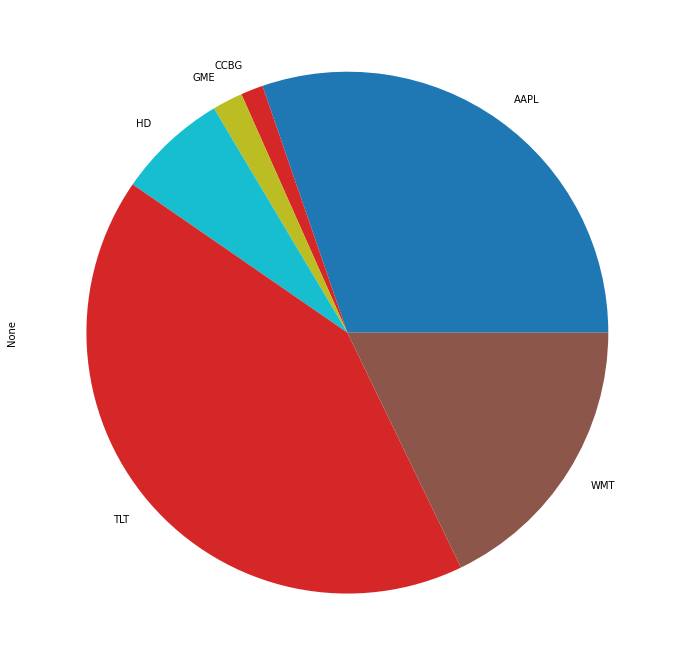

In [41]:
pd.Series(clean).plot.pie(figsize=(18,12))

##Portfolio performance with optimal weights

In [42]:
efffrontier.portfolio_performance(verbose=True, risk_free_rate=0.02) #GT5:Gov (5 years) is 1.82%, we consider the defaulr for risk free rate is 2%

Expected annual return: 19.4%
Annual volatility: 12.2%
Sharpe Ratio: 1.43


(0.19436601557706412, 0.12215515173881344, 1.4274143422938523)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f51d8dc8b90>,
      dtype=object)

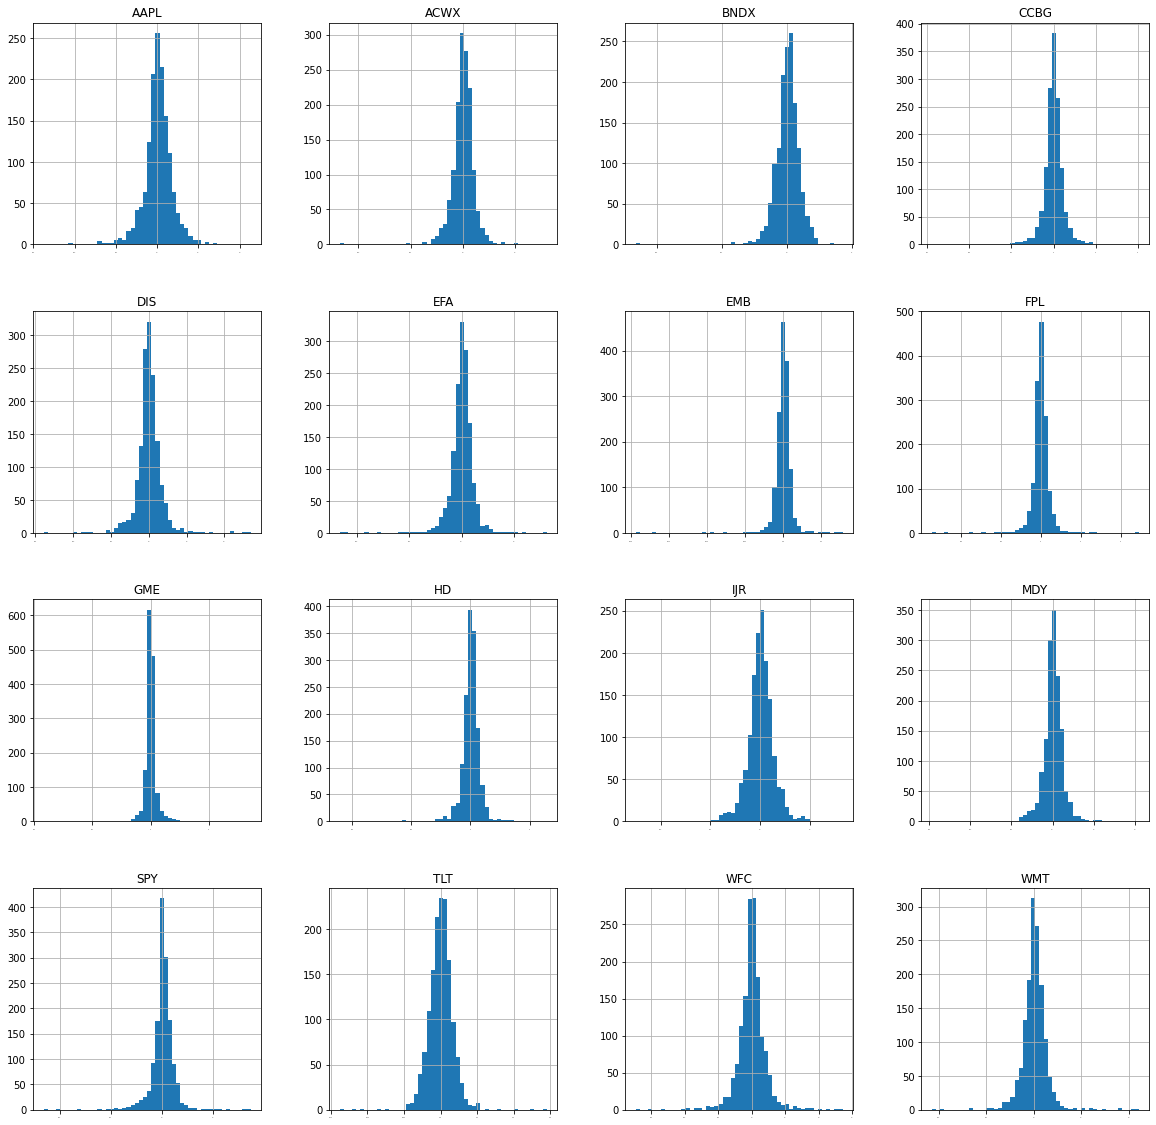

In [43]:
ret1.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, figsize=(20,20))

In [46]:
import seaborn as sns

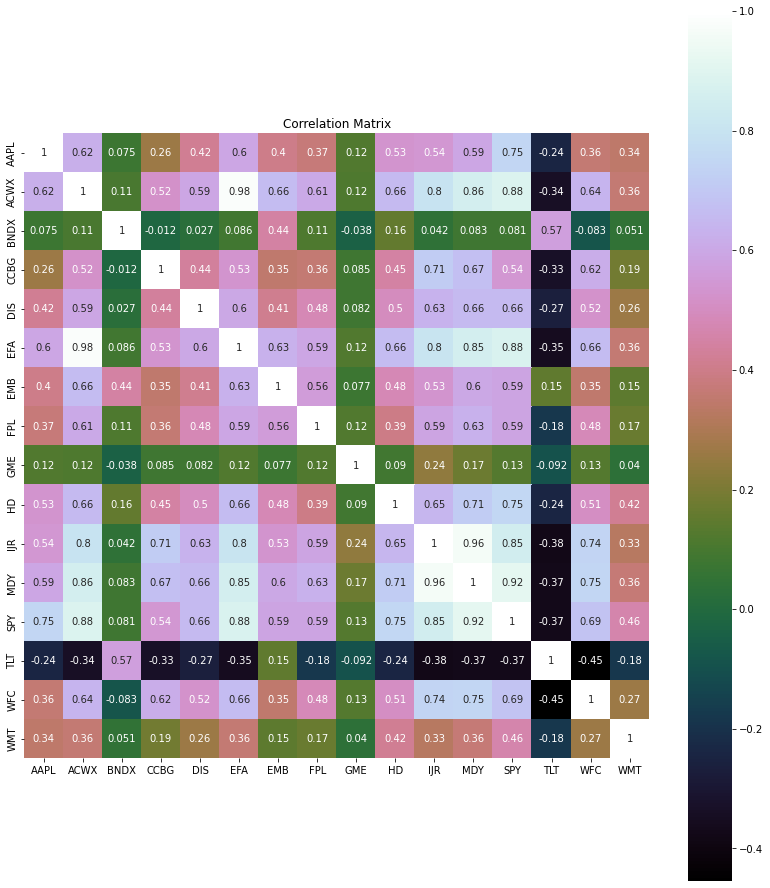

In [45]:
correlation=ret1.corr()
plt.figure(figsize=(14,16))
plt.title("Correlation Matrix")
sns.heatmap(correlation,vmax=1, square=True, annot=True, cmap="cubehelix")

##**Efficient Frontier and Allocation**

Let's ask this question, if I would like to invest $ 70, 754.00, how many quantities of share will i be able to buy. We are going to allocate funds in this optimal portfolio given the weights

In [50]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
lates_pr=get_latest_prices(tickerData)
lates_pr

AAPL    151.076752
ACWX     56.811199
BNDX     55.080952
CCBG     27.798615
DIS     170.080002
EFA      80.196449
EMB     108.085625
FPL       5.712753
GME     218.330002
HD      367.450317
IJR     117.314423
MDY     525.038391
SPY     463.093048
TLT     145.027695
WFC      51.568459
WMT     149.577744
Name: 2021-11-03 00:00:00, dtype: float64

In [51]:
invest=DiscreteAllocation(weight, lates_pr,total_portfolio_value=70754)
allocation, leftover=invest.lp_portfolio()
print(allocation)
print(leftover)

{'AAPL': 142, 'CCBG': 36, 'GME': 6, 'HD': 13, 'TLT': 204, 'WMT': 84}
63.336822509765625


In [52]:
investment=DiscreteAllocation(weight,lates_pr,total_portfolio_value=70754)
allocation, leftover=investment.greedy_portfolio()
print("Discrete allocation",allocation)
print("Fund remaining:${:.2f}".format(leftover))

Discrete allocation {'TLT': 203, 'AAPL': 141, 'WMT': 84, 'HD': 14, 'GME': 6, 'CCBG': 35}
Fund remaining:$19.79


In [53]:
from pypfopt import plotting

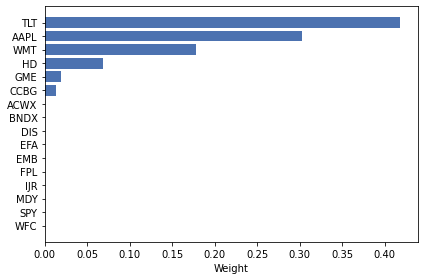

In [54]:
plotting.plot_weights(clean)

A little bit of discussion needs to take place.The function related to EfficientFrontier produces a single optimal portfolio. This means we need all the efficient frontier to be plotted. therefore, we need to establish portfolio considering a range of target risks (a range of standard deviation, a range of target returns (compensation for the risk taken), and a range of risk aversions (utility of the investor). Three functions will come into play: efficient_risk(), efficient_return(), max_quadratic_utility()


In [55]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting
ef=EfficientFrontier(mu1, sigma, weight_bounds=(0,1))

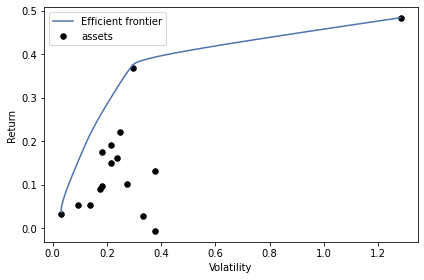

In [56]:
fig, ax=plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)


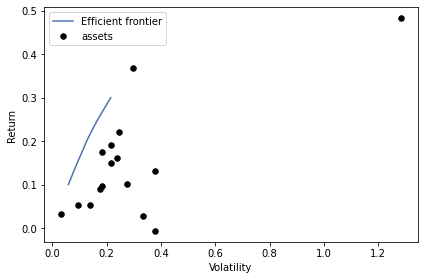

In [57]:
# 100 portfolio with risks between 0.10 and 0.60
risk_range=np.linspace(0.10, 0.30, 100)
plotting.plot_efficient_frontier(ef,ef_param_range=risk_range, show_assets=True)


In [58]:
#Tangency line of the portfolio
ef.max_sharpe()



InstantiationError: ignored

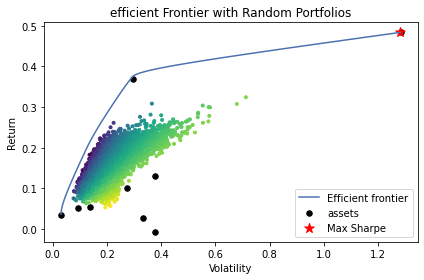

In [59]:
ef=EfficientFrontier(mu1, sigma, weight_bounds=(0,1))
fig, ax=plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
#Tangency line of the portfolio
ret_tangent,std_tangent, _=ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")
n_samples=20000 #generate random portfolios
w=np.random.dirichlet(np.ones(len(mu1)), n_samples)
rets=w.dot(mu1)
stds=np.sqrt(np.diag(w @ sigma @ w.T))
sharpes=rets/stds
ax.scatter(stds,rets, marker=".", c=sharpes, cmap="viridis_r")
#output
ax.set_title("efficient Frontier with Random Portfolios")
ax.legend()
plt.tight_layout()
plt.savefig("efficient.png", dpi=200)
plt.show()


##Value at Risk (VaR) and  Conditional Value at Risk (CVaR)


This section will answer the extreme loss of this portfolio an investor might incurr. We will determine the value at risk (VAR) and the conditional value at risk (CVAR) 


*   VaR: Statistic  measuring portfolio maximun portfolio loss at a particular confidence level.
*   the typical confidence levels that will be considered for this given project are 95%
*   CVar measures expected loss given a minum loss equal to the VaR 
* The conditional value at Risk (CVAR), or expected shortfall (ES) asks what the average loss will be, conditional upon losses exceeding some threshold at a certain confidence level.it uses Var as a point of departure.
(*reference*: )







In [63]:
#Compute the 95% Var using .ppf
annual_return=0.194 # Expected annual return
Annual_deviation=0.122 # volatility of the portfolio
# Sharpe Ratio: 1.43
Var_95=norm.ppf(0.99, loc=annual_return, scale=Annual_deviation)
print("Value at Risk for the portfolio is:", Var_95)


Value at Risk for the portfolio is: 0.47781444063298256


In [116]:
# Worst 5% of cases
tail_loss=norm.expect(lambda x: x, loc=annual_return, scale=Annual_deviation, lb=0.47)
CVAR=(1-.95)*tail_loss
print("Conditional Value at Risk:",round(CVAR*100,2),"%")

Conditional Value at Risk: 0.03 %


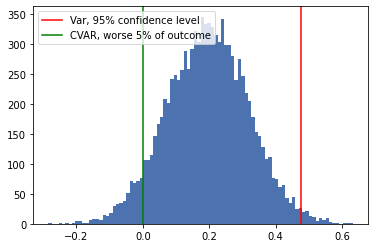

In [115]:
from matplotlib import scale
#plot the nominal distribution
plt.hist(norm.rvs(size=10000, loc=0.194, scale=0.122), bins=90)
plt.axvline(x=Var_95, c="r" ,label="Var, 95% confidence level")
plt.axvline(x=CVAR, c="g", label="CVAR, worse 5% of outcome")
plt.legend();plt.show()

I am not really confident about the results. I investigate more about the process. 